Let's load and pre-process data

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

nltk.download('punkt')
YouTubeVideo = pd.read_excel("../data/ICWSM18 - SALMINEN ET AL.xlsx")
twitter = pd.read_csv("../data/twitter.csv")

dfs = {"Youtube": YouTubeVideo, "Twitter": twitter}

def overview(dfs):
    for name, df in dfs.items():
        print("\n")
        print(f"{name} description")
        print(df.info())
        print("\n")
        print(f"{name} example")
        print(df.head(5))

overview(dfs)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haniw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!




Youtube description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       3222 non-null   int64 
 1   title    3111 non-null   object
 2   type     3222 non-null   object
 3   message  3221 non-null   object
 4   Class    3222 non-null   object
 5   Sub 1    2363 non-null   object
 6   Sub 2    1189 non-null   object
 7   Sub 3    193 non-null    object
 8   Sub 4    11 non-null     object
 9   Sub 5    1 non-null      object
dtypes: int64(1), object(9)
memory usage: 251.8+ KB
None


Youtube example
      ID                                              title   type  \
0  22838  Virginia Police Pepper-Sprayed A Man Having A ...  video   
1  53074  Delaware Police Officer Re-Indicted For Brutal...  video   
2  85387  Laquan McDonald Murder Covered Up By Chicago P...  video   
3  92351  Alabama Police Paralyze Grandfather From India...  video   
4 

In [2]:
def overview(dfs):
    for name, df in dfs.items():
        print("\n")
        print(f"{name} description")
        print(df.info())
        print("\n")
        print(f"{name} example")
        print(df.head(11))

overview(dfs)



Youtube description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       3222 non-null   int64 
 1   title    3111 non-null   object
 2   type     3222 non-null   object
 3   message  3221 non-null   object
 4   Class    3222 non-null   object
 5   Sub 1    2363 non-null   object
 6   Sub 2    1189 non-null   object
 7   Sub 3    193 non-null    object
 8   Sub 4    11 non-null     object
 9   Sub 5    1 non-null      object
dtypes: int64(1), object(9)
memory usage: 251.8+ KB
None


Youtube example
        ID                                              title   type  \
0    22838  Virginia Police Pepper-Sprayed A Man Having A ...  video   
1    53074  Delaware Police Officer Re-Indicted For Brutal...  video   
2    85387  Laquan McDonald Murder Covered Up By Chicago P...  video   
3    92351  Alabama Police Paralyze Grandfather From India...  v

,text,label,num_words,num_sentences,source
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,34,3,Twitter
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1,26,3,Twitter
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1,35,4,Twitter
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1,20,2,Twitter
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1,43,2,Twitter
...,...,...,...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1,43,4,Twitter
24779,"you've gone and broke the wrong heart baby, an...",0,15,1,Twitter
24780,young buck wanna eat!!.. dat nigguh like I ain...,1,17,2,Twitter
24781,youu got wild bitches tellin you lies,1,7,1,Twitter


In [4]:
def standardize_datasets(dfs):
    dfs["Twitter"] = dfs["Twitter"][["tweet", "class"]]
    dfs["Twitter"] = dfs["Twitter"].rename(columns={"tweet": "text", "class": "label"})
    # 0 indicates hate speech, 2 indicates nothing. we need to reencode to 0, 1. (0=no hate speech, 1=hate speech).
    dfs["Twitter"]["label"] = dfs["Twitter"]["label"].replace({0: 1, 2: 0})
    dfs["Youtube"] = dfs["Youtube"][["message", "Class"]]
    dfs["Youtube"] = dfs["Youtube"].rename(columns={"message": "text", "Class": "label"})

standardize_datasets(dfs)
overview(dfs)



Youtube description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3221 non-null   object
 1   label   3222 non-null   object
dtypes: object(2)
memory usage: 50.5+ KB
None


Youtube example
                                                 text    label
0   this is disgusting and heartbreaking. they sho...  Hateful
1   Fuck that cop. Nothing but a fucking thug. \n\...  Hateful
2   Fucking piece of shit cops, protect and serve ...  Hateful
3   Land of the free... My fucking ass. America is...  Hateful
4              These fucking cops are out of control!  Hateful
5   cops like these are the biggest pussies. as a ...  Hateful
6   People should just group up and jump these fuc...  Hateful
7   Of course cops couldn't make it before the rob...  Hateful
8   The cop's a pig, but I wouldn't mind him body ...  Hateful
9   I hope that piece of shit gets

In [6]:
def check_for_missing_values(dfs):
    for name, df in dfs.items():
        print(f"{name}")
        print(df.isnull().sum())

check_for_missing_values(dfs)

Youtube
text     1
label    0
dtype: int64
Twitter
text     0
label    0
dtype: int64


In [8]:
def drop_missings(dfs):
    for name, df in dfs.items():
        df.dropna(inplace=True)

drop_missings(dfs)
check_for_missing_values(dfs)

Youtube
text     0
label    0
dtype: int64
Twitter
text     0
label    0
dtype: int64


In [10]:
# Functions to calculate number of words and sentences
def count_words(text):
    words = nltk.word_tokenize(text)
    return len(words)

def count_sentences(text):
    sentences = nltk.sent_tokenize(text)
    return len(sentences)

def process_df(df):
    # Apply functions to DataFrame
    df['num_words'] = df['text'].apply(count_words)
    df['num_sentences'] = df['text'].apply(count_sentences)

for name, df in dfs.items():
    process_df(df)

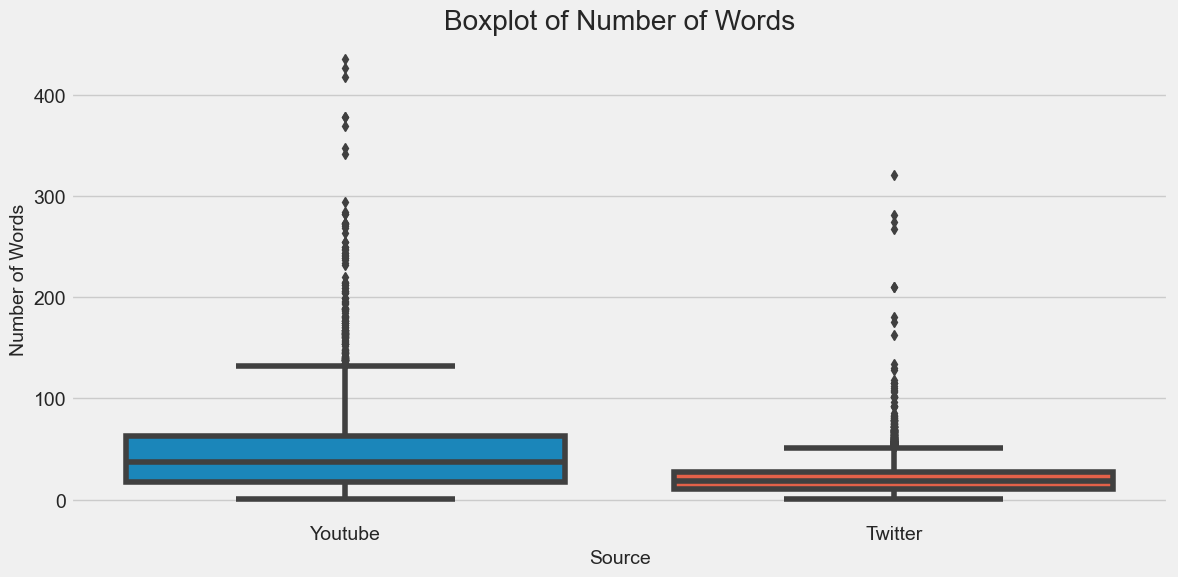

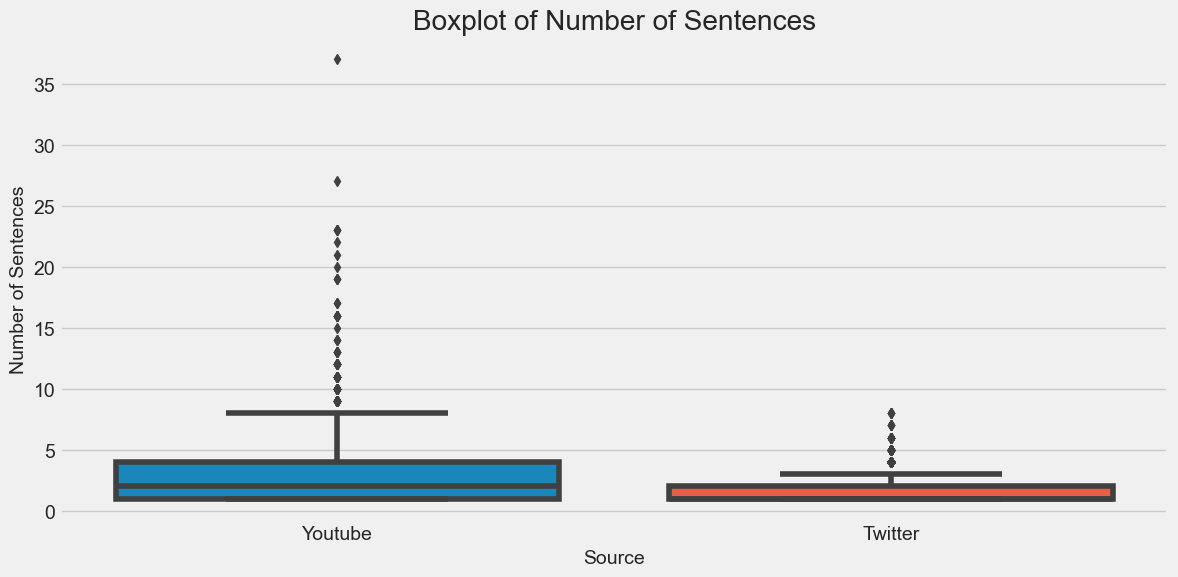

In [11]:
def plot_num_words(dfs):
    # Combine all DataFrames into one for easier plotting
    combined_df = pd.DataFrame()
    for name, df in dfs.items():
        df['source'] = name
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='source', y='num_words', data=combined_df)
    plt.title('Boxplot of Number of Words')
    plt.xlabel('Source')
    plt.ylabel('Number of Words')
    plt.tight_layout()
    plt.show()

def plot_num_sentences(dfs):
    # Combine all DataFrames into one for easier plotting
    combined_df = pd.DataFrame()
    for name, df in dfs.items():
        df['source'] = name
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='source', y='num_sentences', data=combined_df)
    plt.title('Boxplot of Number of Sentences')
    plt.xlabel('Source')
    plt.ylabel('Number of Sentences')
    plt.tight_layout()
    plt.show()

plot_num_words(dfs)
plot_num_sentences(dfs)

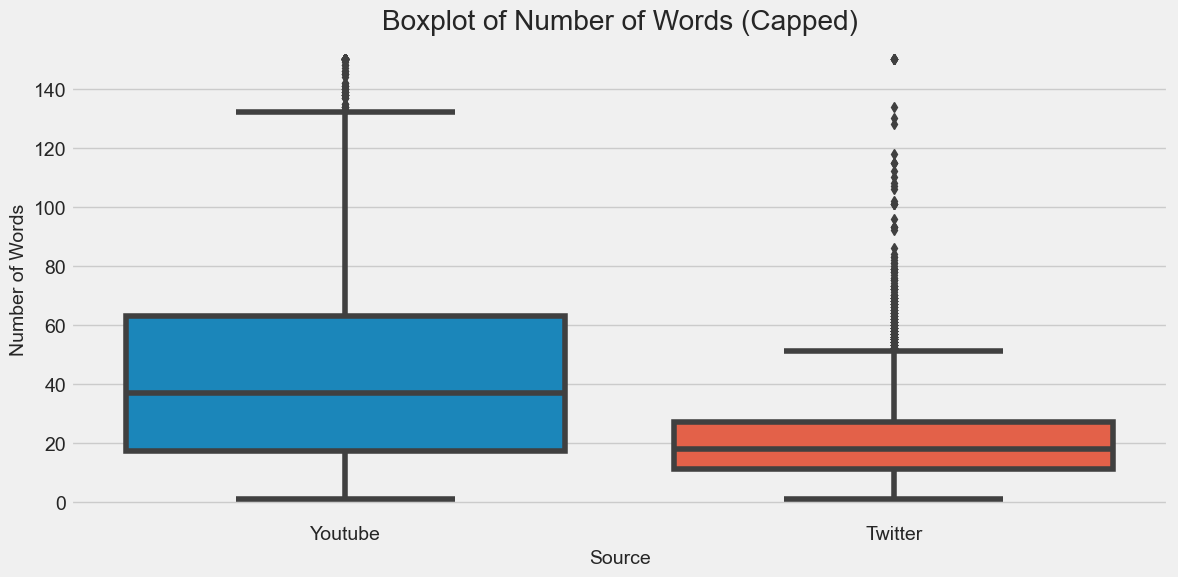

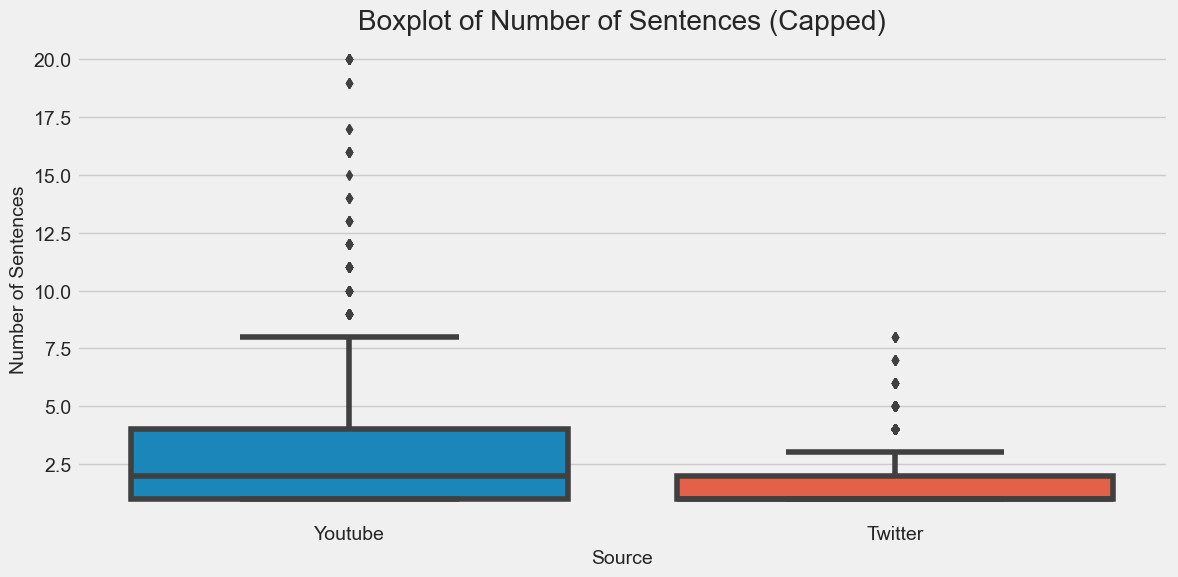

In [12]:
def cap_outliers(df, column, upper_bound):
    df_copy = df.copy()
    df_copy[column] = df_copy[column].apply(lambda x: min(x, upper_bound))
    return df_copy

def plot_num_words(dfs, upper_bound):
    # Combine all DataFrames into one for easier plotting
    combined_df = pd.DataFrame()
    for name, df in dfs.items():
        df_capped = cap_outliers(df, 'num_words', upper_bound)
        df_capped['source'] = name
        combined_df = pd.concat([combined_df, df_capped], ignore_index=True)
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='source', y='num_words', data=combined_df)
    plt.title('Boxplot of Number of Words (Capped)')
    plt.xlabel('Source')
    plt.ylabel('Number of Words')
    plt.tight_layout()
    plt.show()

def plot_num_sentences(dfs, upper_bound):
    # Combine all DataFrames into one for easier plotting
    combined_df = pd.DataFrame()
    for name, df in dfs.items():
        df_capped = cap_outliers(df, 'num_sentences', upper_bound)
        df_capped['source'] = name
        combined_df = pd.concat([combined_df, df_capped], ignore_index=True)
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='source', y='num_sentences', data=combined_df)
    plt.title('Boxplot of Number of Sentences (Capped)')
    plt.xlabel('Source')
    plt.ylabel('Number of Sentences')
    plt.tight_layout()
    plt.show()

plot_num_words(dfs, 150)
plot_num_sentences(dfs, 20)

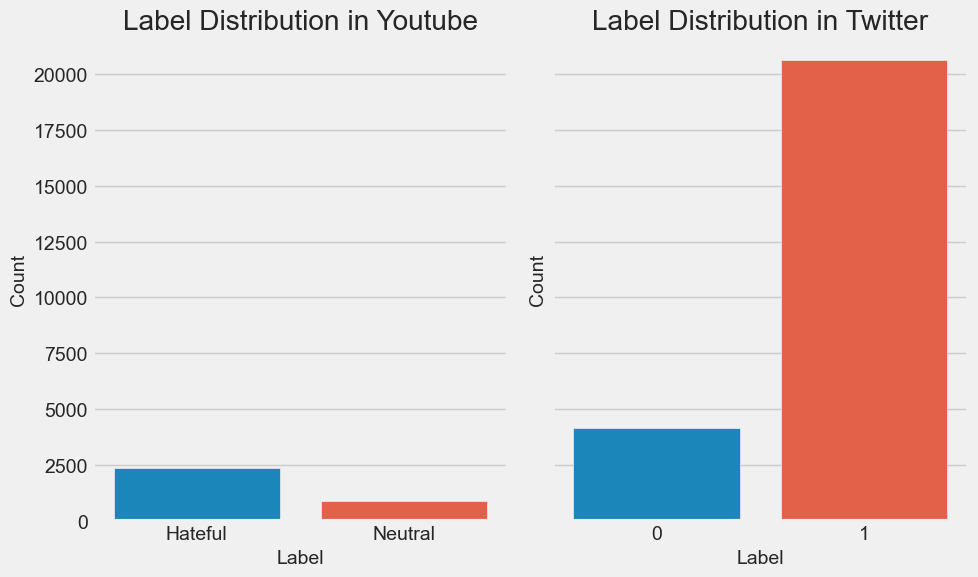

In [13]:
def plot_label_distribution(dfs):
    # Prepare the figure for subplots
    num_dfs = len(dfs)
    fig, axes = plt.subplots(1, num_dfs, figsize=(5 * num_dfs, 6), sharey=True)
    
    if num_dfs == 1:
        axes = [axes]  # Make sure axes is iterable if there's only one DataFrame

    # Plot each DataFrame
    for ax, (name, df) in zip(axes, dfs.items()):
        sns.countplot(x='label', data=df, ax=ax)
        ax.set_title(f'Label Distribution in {name}')
        ax.set_xlabel('Label')
        ax.set_ylabel('Count')

    plt.tight_layout()
    plt.show()

plot_label_distribution(dfs)